# **Principle of AI Final Project**

## **CIFAR-10 Image Classification using CNN**

* Umarkhodzha Khodzhaev 2018296

In [1]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import os
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading the CIFAR-10 dataset
from keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


In [3]:
# Checking the shapes
print(f'x_train shape: {x_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'x_test shape: {x_test.shape}')
print(f'y_test shape: {y_test.shape}')

x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


* X_train consists of 50,000 images with dimensions of 32x32 pixels and in the form of RGB (colored)
* y_train consists of 50,000 labels for images
* X_test consists of 10,000 images with dimensions of 32x32 pixels and in the form of RGB (colored)

In [4]:
# Number of classes
num_classes = len(np.unique(y_train))
print("Number of classes:", num_classes)

Number of classes: 10


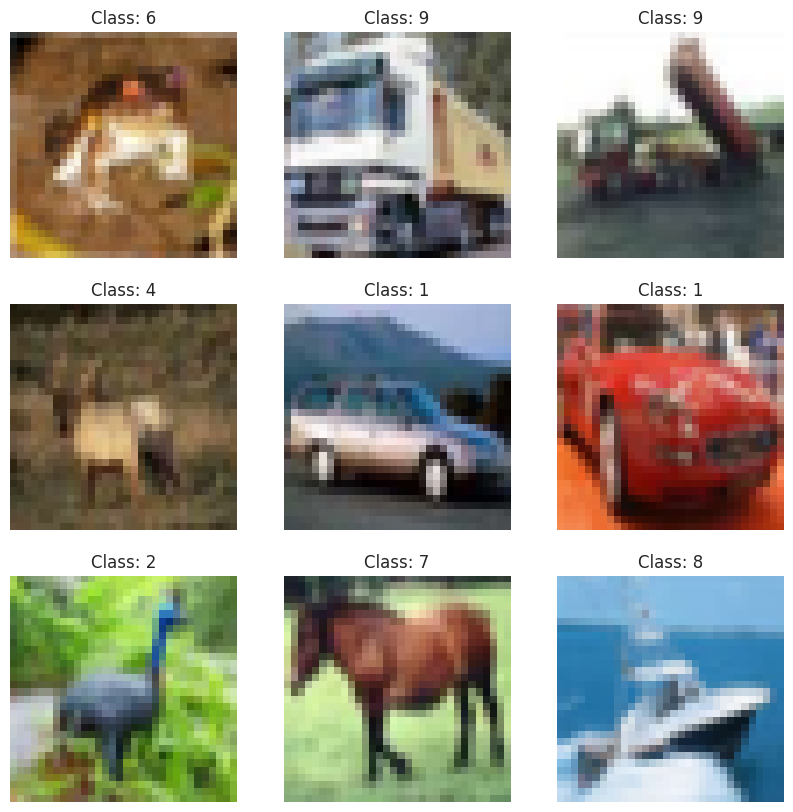

In [5]:
# Visualizing some of the images
num_images_to_show = 9
plt.figure(figsize=(10, 10))
for i in range(num_images_to_show):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.title(f"Class: {y_train[i][0]}")
    plt.axis("off")
plt.show()

In [6]:
from collections import Counter

# Count class occurrences in the training set
class_counts = Counter(y_train.flatten()) #flatten to make it 1D

# Convert to a dictionary for easier handling
class_counts_dict = dict(class_counts)

# Print class distribution
for class_label, count in class_counts_dict.items():
    print(f"Class {class_label}: {count} samples")

Class 6: 5000 samples
Class 9: 5000 samples
Class 4: 5000 samples
Class 1: 5000 samples
Class 2: 5000 samples
Class 7: 5000 samples
Class 8: 5000 samples
Class 3: 5000 samples
Class 5: 5000 samples
Class 0: 5000 samples


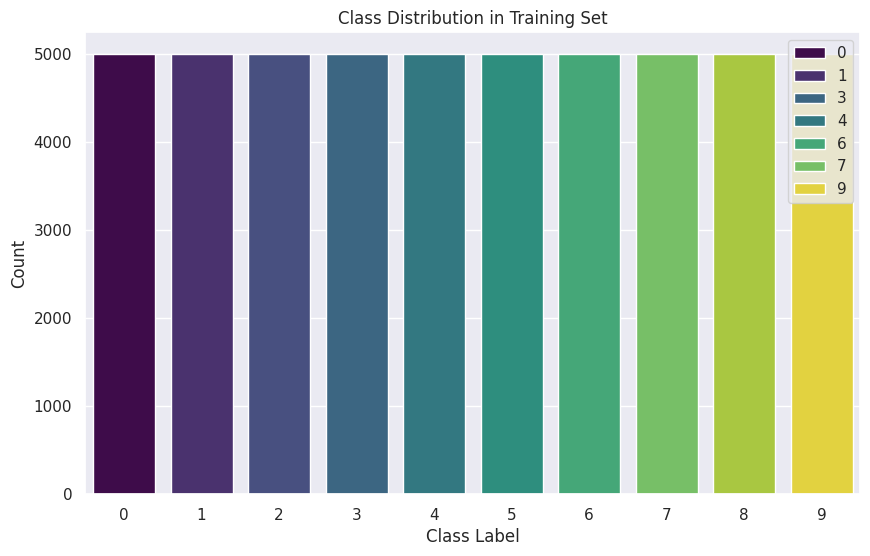

In [7]:
# Count class occurrences
class_counts = Counter(y_train.flatten())
class_labels = sorted(class_counts.keys())
class_values = [class_counts[label] for label in class_labels]

# Create a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=class_labels, y=class_values, palette='viridis', hue=class_labels)
plt.xlabel('Class Label')
plt.ylabel('Count')
plt.title('Class Distribution in Training Set')
plt.show()

In [8]:
# Calculate mean and std for each channel on the training set
mean = np.mean(x_train, axis=(0, 1, 2))
std = np.std(x_train, axis=(0, 1, 2))

# Normalize training and test data
x_train = (x_train - mean) / std
x_test = (x_test - mean) / std

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=20,        # Rotate images by up to 20 degrees
    width_shift_range=0.2,    # Horizontally shift images by up to 20% of the width
    height_shift_range=0.2,   # Vertically shift images by up to 20% of the height
    zoom_range=0.2,           # Zoom in/out by up to 20%
    horizontal_flip=True,     # Randomly flip images horizontally
    brightness_range=[0.8, 1.2] # Adjust brightness
)

In [10]:
from tensorflow.keras.utils import to_categorical

num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

### **MODEL BUILDING FROM SCRATCH**

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization

kernel_size = (3, 3)
custom_model = Sequential()

# Block 1
custom_model.add(Conv2D(filters=32, kernel_size=kernel_size, input_shape=(32, 32, 3), activation='relu', padding='same'))
custom_model.add(BatchNormalization())
custom_model.add(Conv2D(filters=32, kernel_size=kernel_size, activation='relu', padding='same'))
custom_model.add(BatchNormalization())
custom_model.add(MaxPool2D(pool_size=(2, 2)))
custom_model.add(Dropout(0.3))  # Increased dropout

# Block 2
custom_model.add(Conv2D(filters=64, kernel_size=kernel_size, activation='relu', padding='same'))
custom_model.add(BatchNormalization())
custom_model.add(Conv2D(filters=64, kernel_size=kernel_size, activation='relu', padding='same'))
custom_model.add(BatchNormalization())
custom_model.add(MaxPool2D(pool_size=(2, 2)))
custom_model.add(Dropout(0.35))  # Increased dropout

# Block 3
custom_model.add(Conv2D(filters=128, kernel_size=kernel_size, activation='relu', padding='same'))
custom_model.add(BatchNormalization())
custom_model.add(Conv2D(filters=128, kernel_size=kernel_size, activation='relu', padding='same'))
custom_model.add(BatchNormalization())
custom_model.add(MaxPool2D(pool_size=(2, 2)))
custom_model.add(Dropout(0.4))  # Increased dropout

# Fully Connected Layers
custom_model.add(Flatten())
custom_model.add(Dense(512, activation='relu'))
custom_model.add(Dropout(0.5))  # Increased dropout before output layer
custom_model.add(Dense(10, activation='softmax'))

custom_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
custom_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 8, 8, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_11               │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 1,343,018 (5.12 MB)

 Trainable params: 1,342,122 (5.12 MB)

 Non-trainable params: 896 (3.50 KB)

### **TRAINING**

In [14]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)

callbacks = [early_stopping, reduce_lr]

history = custom_model.fit(datagen.flow(x_train, y_train, batch_size=64), epochs=50, validation_data=(x_test, y_test), callbacks=callbacks)

# Saving the model
custom_model.save('custom_model.h5')

Epoch 1/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 69s 73ms/step - accuracy: 0.2615 - loss: 2.2676 - val_accuracy: 0.4523 - val_loss: 1.5244 - learning_rate: 0.0010
Epoch 2/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 50s 63ms/step - accuracy: 0.3980 - loss: 1.6343 - val_accuracy: 0.5105 - val_loss: 1.3806 - learning_rate: 0.0010
Epoch 3/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 51s 65ms/step - accuracy: 0.4673 - loss: 1.4783 - val_accuracy: 0.5198 - val_loss: 1.4358 - learning_rate: 0.0010
Epoch 4/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 49s 63ms/step - accuracy: 0.5155 - loss: 1.3545 - val_accuracy: 0.5901 - val_loss: 1.1915 - learning_rate: 0.0010
Epoch 5/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 49s 63ms/step - accuracy: 0.5519 - loss: 1.2691 - val_accuracy: 0.6432 - val_loss: 1.0243 - learning_rate: 0.0010
Epoch 6/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 50s 63ms/step - accuracy: 0.5888 - loss: 1.1737 - val_accuracy: 0.6319 - val_loss: 1.0990 - learning_rate: 0.0010
Epoch 7/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 50s 63ms/step - accuracy: 0.6109 - l

In [16]:
custom_model.save('custom_model.keras')

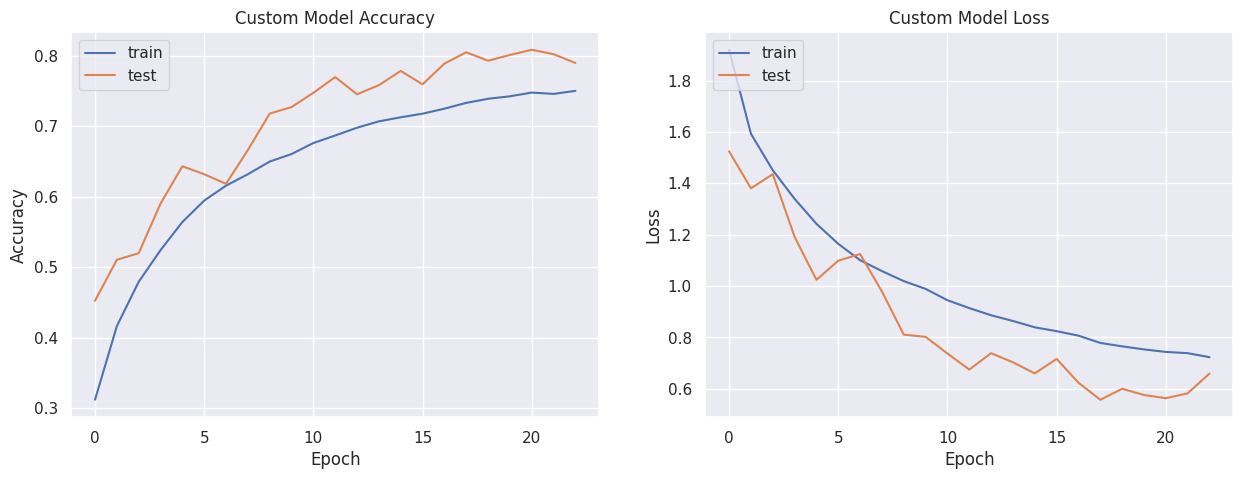

In [15]:
# Visualizing the model's accuracy and loss in a 1x2 subplot
fig, axs = plt.subplots(1, 2, figsize=(15,5))
axs[0].plot(history.history['accuracy'])
axs[0].plot(history.history['val_accuracy'])
axs[0].set_title('Custom Model Accuracy')
axs[0].set_ylabel('Accuracy')
axs[0].set_xlabel('Epoch')
axs[0].legend(['train', 'test'], loc='upper left')

axs[1].plot(history.history['loss'])
axs[1].plot(history.history['val_loss'])
axs[1].set_title('Custom Model Loss')
axs[1].set_ylabel('Loss')
axs[1].set_xlabel('Epoch')
axs[1].legend(['train', 'test'], loc='upper left')

plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


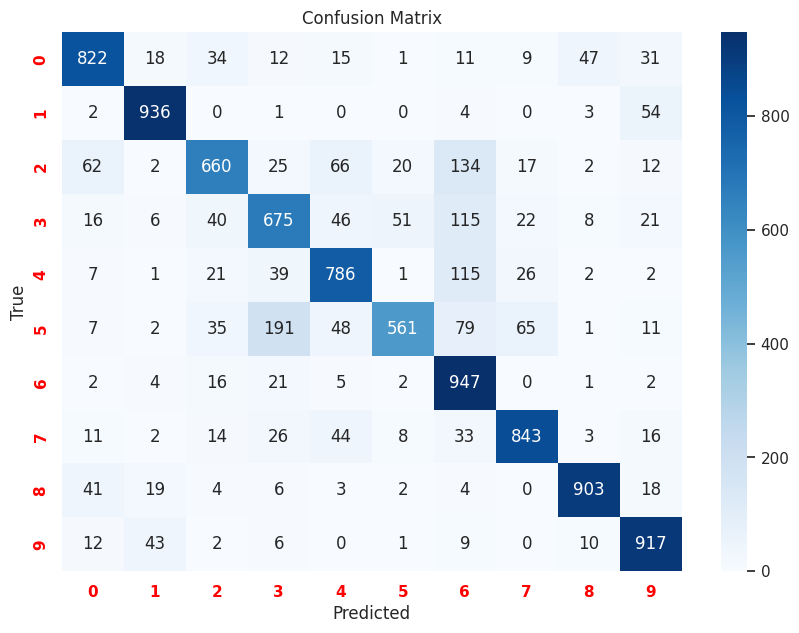

In [19]:
# Confusion matrix for a custom made model
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict classes for the test set
y_pred = custom_model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Compute confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")

# Get the current axes object
ax = plt.gca()

# Make xticks bold and red
for tick in ax.get_xticklabels():
    tick.set_fontweight('bold')
    tick.set_color('red')

# Make yticks bold and red
for tick in ax.get_yticklabels():
    tick.set_fontweight('bold')
    tick.set_color('red')

plt.show()

### **Transfer Learning with VIT-H/14**

In [21]:
# Install necessary libraries but hiding the
!pip install -q transformers datasets

# Import required libraries
import torch
from transformers import ViTForImageClassification, ViTFeatureExtractor
from torch.utils.data import DataLoader, random_split
from torchvision import datasets, transforms
from torch.optim import AdamW
from torch.nn import CrossEntropyLoss
from tqdm import tqdm

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load CIFAR-10 dataset
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize CIFAR-10 images to 224x224
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # Normalize to match ViT's expectations
])

train_dataset = datasets.CIFAR10(root="./data", train=True, transform=transform, download=True)
test_dataset = datasets.CIFAR10(root="./data", train=False, transform=transform, download=True)

# Split train dataset into train and validation
train_size = int(0.8 * len(train_dataset))
val_size = len(train_dataset) - train_size
train_dataset, val_dataset = random_split(train_dataset, [train_size, val_size])

# Create data loaders
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Load pre-trained ViT model
vit_model = ViTForImageClassification.from_pretrained(
    "google/vit-base-patch16-224-in21k",
    num_labels=10  # CIFAR-10 has 10 classes
).to(device)

# Define optimizer and loss function
optimizer = AdamW(vit_model.parameters(), lr=2e-5, weight_decay=1e-4)
criterion = CrossEntropyLoss()

# Training loop
epochs = 5
for epoch in range(epochs):
    vit_model.train()
    train_loss = 0
    correct = 0
    total = 0
    for images, labels in tqdm(train_loader, desc=f"Epoch {epoch + 1}/{epochs}"):
        images, labels = images.to(device), labels.to(device)
        outputs = vit_model(images).logits
        loss = criterion(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_acc = 100 * correct / total
    print(f"Train Loss: {train_loss / len(train_loader):.4f}, Train Accuracy: {train_acc:.2f}%")

    # Validation
    vit_model.eval()
    val_loss = 0
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = vit_model(images).logits
            loss = criterion(outputs, labels)

            val_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    val_acc = 100 * correct / total
    print(f"Validation Loss: {val_loss / len(val_loader):.4f}, Validation Accuracy: {val_acc:.2f}%")

# Test the model
vit_model.eval()
test_correct = 0
test_total = 0
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = vit_model(images).logits
        _, predicted = torch.max(outputs, 1)
        test_total += labels.size(0)
        test_correct += (predicted == labels).sum().item()

test_acc = 100 * test_correct / test_total
print(f"Test Accuracy: {test_acc:.2f}%")

100%|██████████| 170M/170M [00:05<00:00, 30.9MB/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


config.json:   0%|          | 0.00/502 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224-in21k and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Epoch 1/5: 100%|██████████| 1250/1250 [21:09<00:00,  1.02s/it]


Train Loss: 0.4146, Train Accuracy: 95.60%
Validation Loss: 0.1164, Validation Accuracy: 98.17%


Epoch 2/5: 100%|██████████| 1250/1250 [21:07<00:00,  1.01s/it]


Train Loss: 0.0620, Train Accuracy: 99.19%
Validation Loss: 0.0780, Validation Accuracy: 98.10%


Epoch 3/5: 100%|██████████| 1250/1250 [21:08<00:00,  1.01s/it]


Train Loss: 0.0269, Train Accuracy: 99.60%
Validation Loss: 0.0852, Validation Accuracy: 97.73%


Epoch 4/5: 100%|██████████| 1250/1250 [21:08<00:00,  1.01s/it]


Train Loss: 0.0177, Train Accuracy: 99.64%
Validation Loss: 0.0674, Validation Accuracy: 98.38%


Epoch 5/5: 100%|██████████| 1250/1250 [21:08<00:00,  1.01s/it]


Train Loss: 0.0106, Train Accuracy: 99.78%
Validation Loss: 0.0751, Validation Accuracy: 98.14%
Test Accuracy: 97.84%


In [22]:
# Saving the model
torch.save(vit_model.state_dict(), 'vit_model.pth')

Test Accuracy: 97.84%


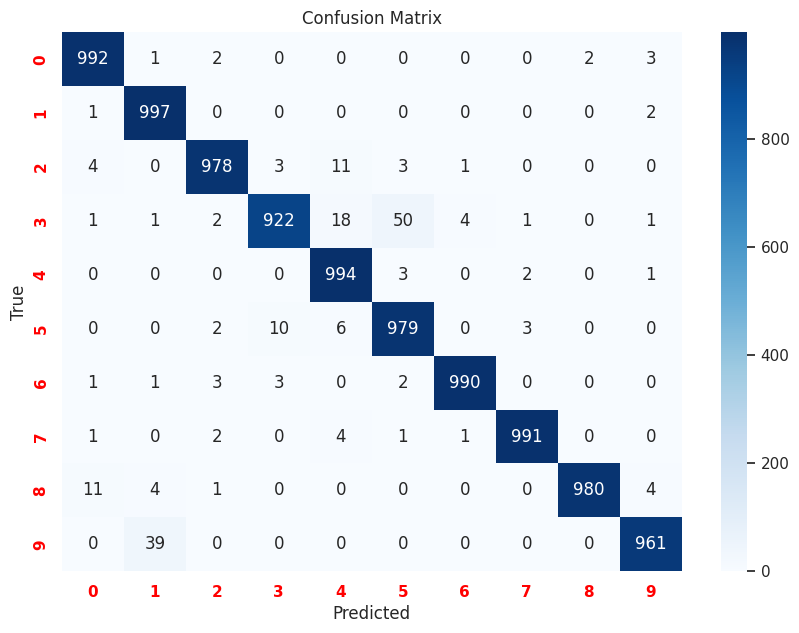

In [24]:
# Import the necessary libraries for confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Test the model and generate confusion matrix
vit_model.eval()
test_correct = 0
test_total = 0
all_preds = []
all_labels = []

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = vit_model(images).logits
        _, predicted = torch.max(outputs, 1)
        test_total += labels.size(0)
        test_correct += (predicted == labels).sum().item()

        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Calculate the accuracy
test_acc = 100 * test_correct / test_total
print(f"Test Accuracy: {test_acc:.2f}%")

# Compute confusion matrix
cm = confusion_matrix(all_labels, all_preds)

# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")

# Get the current axes object
ax = plt.gca()

# Make xticks bold and red
for tick in ax.get_xticklabels():
    tick.set_fontweight('bold')
    tick.set_color('red')

# Make yticks bold and red
for tick in ax.get_yticklabels():
    tick.set_fontweight('bold')
    tick.set_color('red')

plt.show()

### **Evaluating the Custom Made Model**

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


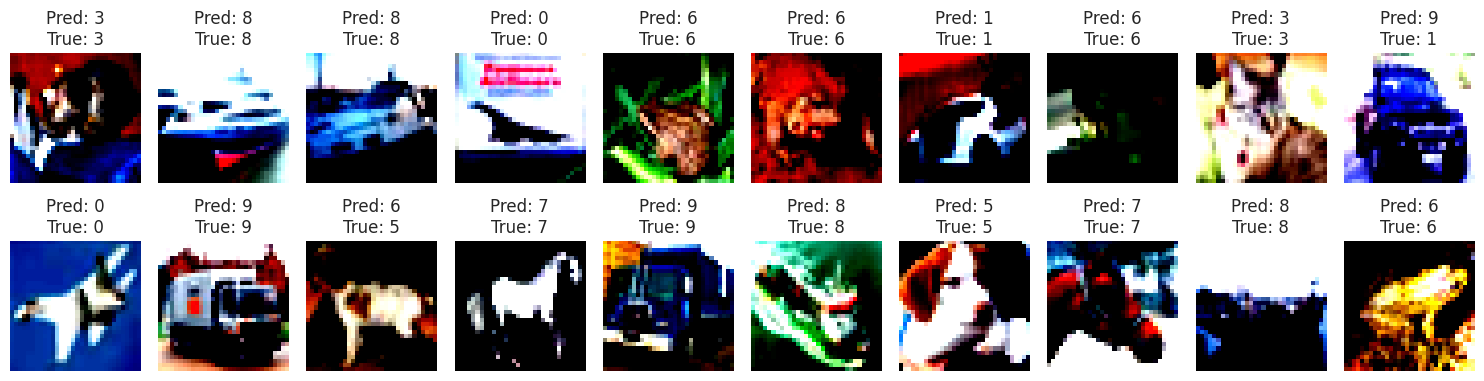

In [41]:
# Visualize some predictions made by custom CNN model

def visualize_predictions(model, x_test, y_test, num_images=20):
    # Predict on the test set
    y_pred = model.predict(x_test[:num_images])

    # Convert predictions from one-hot encoding to class labels
    y_pred_labels = np.argmax(y_pred, axis=1)
    y_test_labels = np.argmax(y_test, axis=1)

    # Calculate the number of rows and columns
    rows = 3
    cols = (num_images + 1) // 2

    # Plot the images and their predicted labels
    plt.figure(figsize=(15, 6))
    for i in range(num_images):
        plt.subplot(rows, cols, i + 1)
        plt.imshow(x_test[i])
        plt.title(f"Pred: {y_pred_labels[i]}\nTrue: {y_test_labels[i]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Call the function to visualize predictions
visualize_predictions(custom_model, x_test, y_test)


In [25]:
from sklearn.metrics import classification_report, confusion_matrix

# Step 1: Get model predictions
y_pred = custom_model.predict(x_test)

# Step 2: Convert predictions to labels
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Step 3: Generate classification report
report = classification_report(y_true, y_pred_classes, target_names=[f"Class {i}" for i in range(10)])
print("Classification Report:\n", report)



313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Classification Report:
               precision    recall  f1-score   support

     Class 0       0.84      0.82      0.83      1000
     Class 1       0.91      0.94      0.92      1000
     Class 2       0.80      0.66      0.72      1000
     Class 3       0.67      0.68      0.67      1000
     Class 4       0.78      0.79      0.78      1000
     Class 5       0.87      0.56      0.68      1000
     Class 6       0.65      0.95      0.77      1000
     Class 7       0.86      0.84      0.85      1000
     Class 8       0.92      0.90      0.91      1000
     Class 9       0.85      0.92      0.88      1000

    accuracy                           0.81     10000
   macro avg       0.81      0.81      0.80     10000
weighted avg       0.81      0.81      0.80     10000



### **Testing Custom Made Model on unseen pictures from the internet**

Image array shape: (1, 32, 32, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predictions for /content/car.jpg:
airplane: 0.0025
automobile: 0.9975
bird: 0.0000
cat: 0.0000
deer: 0.0000
dog: 0.0000
frog: 0.0000
horse: 0.0000
ship: 0.0000
truck: 0.0000


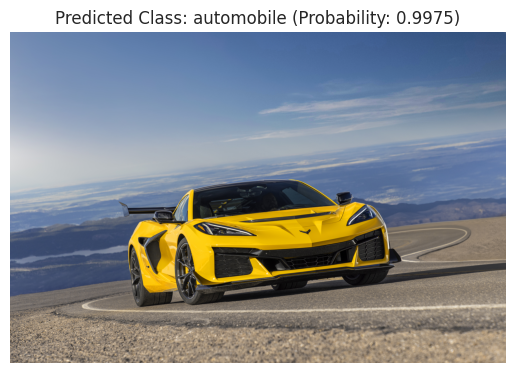

Image array shape: (1, 32, 32, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predictions for /content/airplane.jpg:
airplane: 0.9998
automobile: 0.0000
bird: 0.0002
cat: 0.0000
deer: 0.0000
dog: 0.0000
frog: 0.0000
horse: 0.0000
ship: 0.0000
truck: 0.0000


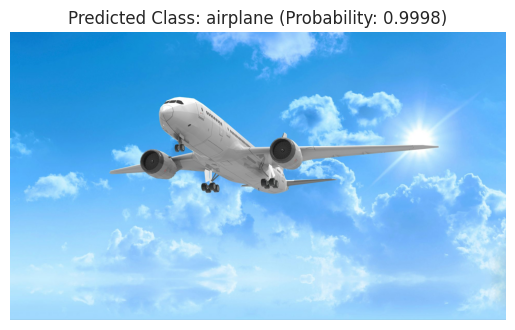

Image array shape: (1, 32, 32, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predictions for /content/horse3.jpeg:
airplane: 0.9362
automobile: 0.0275
bird: 0.0000
cat: 0.0000
deer: 0.0000
dog: 0.0000
frog: 0.0000
horse: 0.0000
ship: 0.0000
truck: 0.0363


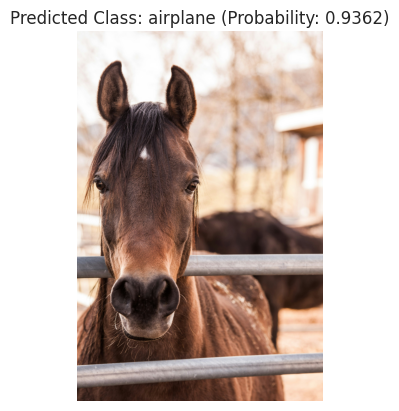

In [61]:
from tensorflow.keras.preprocessing import image

# Function to preprocess and predict multiple images
def evaluate_images_cnn(model, image_paths, class_names, mean, std):
    # Loop through each image path
    for img_path in image_paths:
        # Load and preprocess the image
        img = image.load_img(img_path, target_size=(32, 32))
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)

        # Normalize using training data's mean and std
        img_array = (img_array - mean) / std

        # Debug: Check the shape of the image
        print(f"Image array shape: {img_array.shape}")

        # Predict the class probabilities
        pred = model.predict(img_array)
        predicted_probs = pred.flatten()

        # Map class names to their respective probabilities
        predictions_dict = dict(zip(class_names, predicted_probs))

        # Print class probabilities
        print(f"Predictions for {img_path}:")
        for class_name, prob in predictions_dict.items():
            print(f"{class_name}: {prob:.4f}")

        # Find the class with the highest probability
        predicted_class_index = np.argmax(predicted_probs)
        predicted_class = class_names[predicted_class_index]
        predicted_prob = predicted_probs[predicted_class_index]

        # Display the image with the predicted class and probability
        img_display = image.load_img(img_path)
        plt.imshow(img_display)
        plt.title(f"Predicted Class: {predicted_class} (Probability: {predicted_prob:.4f})")
        plt.axis('off')
        plt.show()


# List of image paths
image_paths = ['/content/car.jpg', '/content/airplane.jpg', '/content/horse3.jpeg']

# Class names for CIFAR-10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Calculate mean and std from training data
mean = np.mean(x_train, axis=(0, 1, 2))
std = np.std(x_train, axis=(0, 1, 2))

# Call the function with the model and list of image paths
evaluate_images_cnn(custom_model, image_paths, class_names, mean, std)


### **Testing Vision Transformet (VIT-14) model on unseen pictures**

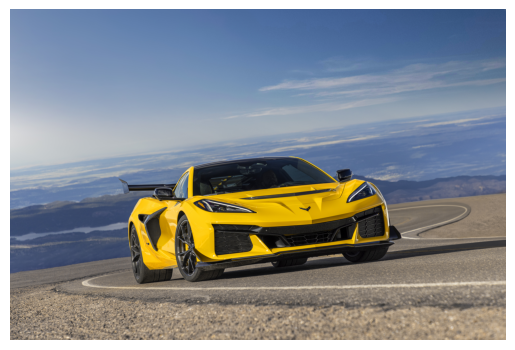

Predicted Class: automobile


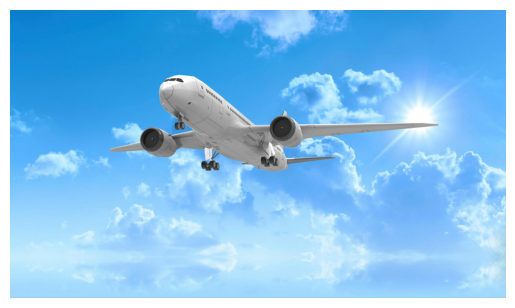

Predicted Class: airplane


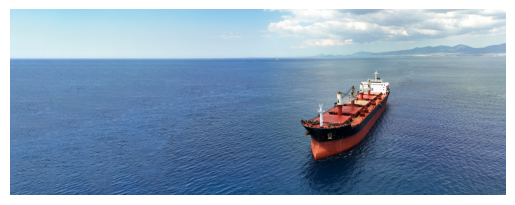

Predicted Class: ship


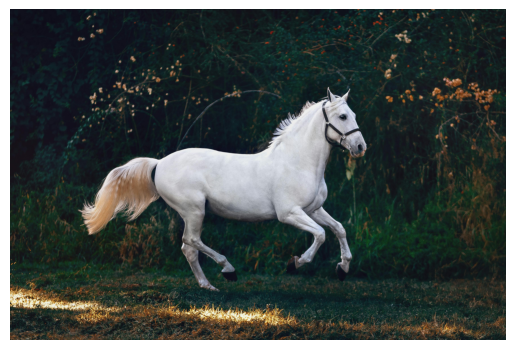

Predicted Class: horse


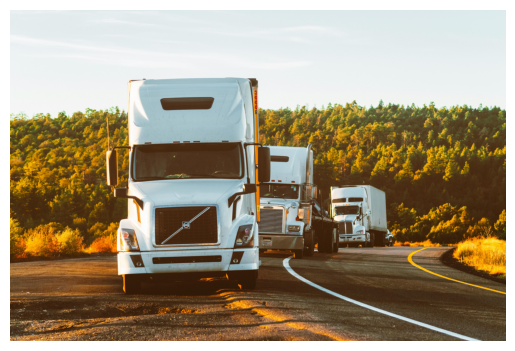

Predicted Class: truck


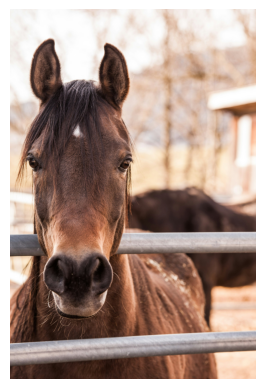

Predicted Class: horse


In [62]:
from PIL import Image
import matplotlib.pyplot as plt

# Define a function to preprocess and evaluate a single image or a list of images
def evaluate_new_images(model, image_paths, class_names, device):
    # Transformation (same as used for training)
    transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
    ])

    model.eval()  # Set model to evaluation mode
    for image_path in image_paths:
        # Load the image
        image = Image.open(image_path).convert("RGB")
        plt.imshow(image)
        plt.axis('off')
        plt.show()

        # Preprocess the image
        input_tensor = transform(image).unsqueeze(0).to(device)

        # Perform prediction
        with torch.no_grad():
            output = model(input_tensor).logits
            predicted_class = torch.argmax(output, dim=1).item()

        # Display the result
        print(f"Predicted Class: {class_names[predicted_class]}")




# List of image paths to evaluate
new_image_paths = ["/content/car.jpg", "/content/airplane.jpg", '/content/ship.jpg', '/content/horse.jpeg',
                   '/content/truck.jpeg', '/content/horse3.jpeg']

# CIFAR-10 class names
class_names = [
    "airplane", "automobile", "bird", "cat", "deer",
    "dog", "frog", "horse", "ship", "truck"
]

# Evaluate new images
evaluate_new_images(vit_model, new_image_paths, class_names, device)
